In [390]:
!pip install -U pandas
!pip install -U matplotlib
!pip install -U seaborn
!pip install -U plotly==5.22.0
!pip install -U nbformat==4.2.0 

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import numpy as np

In [15]:
raw_client_data = pd.read_csv('./logs/c-data-letsfed.csv')
raw_server_data = pd.read_csv('./logs/s-data.csv')

In [16]:
s_data = raw_server_data

/tmp/ipykernel_1411568/1446695552.py:2: UserWarning: The dashes list has more values (6) than needed (1), which may not be intended.
  sns.lineplot(


<Axes: xlabel='rounds', ylabel='g_eval_acc'>

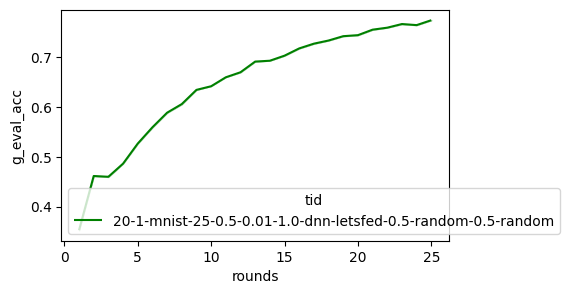

In [17]:
fig, ax = plt.subplots(figsize=(5,3))
sns.lineplot(
    ax=ax,
    data=raw_client_data,
    y='g_eval_acc',
    x='rounds',
    # hue='tid',
    style='tid',
    dashes=[[1,0],[1,0],[1,0], [1,1],[1,1],[1,1]],
    errorbar=('ci', False),
    color='green'
)

In [6]:
from flwr_datasets.partitioner import DirichletPartitioner
from flwr_datasets import FederatedDataset

fds = FederatedDataset(dataset='mnist', partitioners={
    "train": DirichletPartitioner(
                num_partitions = 200,
                partition_by = "label",
                alpha = 1,
                self_balancing = True,
                min_partition_size=50,
            ),
    # "test": IidPartitioner(num_partitions=50)
})
a = fds.load_partition(0, 'train')


In [41]:
a = fds.load_partition(4, 'train')
a

Dataset({
    features: ['image', 'label'],
    num_rows: 162
})

# NO IDD AND IDD

In [7]:
d = pd.read_csv('logs/c-data-test-iid.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'logs/c-data-test-iid.csv'

In [8]:
d = pd.read_csv('logs/c-data-test-no-iid.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'logs/c-data-test-no-iid.csv'

NameError: name 'd' is not defined

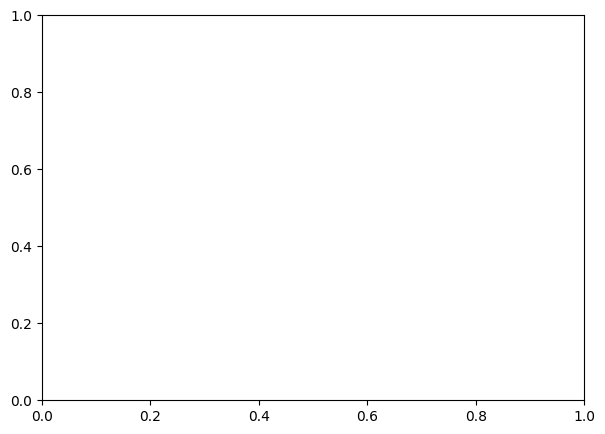

In [9]:
fig, ax = plt.subplots(figsize=(7,5))

sns.lineplot(ax=ax, data=d, x='rounds', y='g_eval_acc', dashes=[1,1], marker="o", label="Federated", color=np.array([1.4620e-03, 4.6600e-04, 1.3866e-02, 1.0000e+00]))
sns.lineplot(ax=ax, data=d, x='rounds', y='l_eval_acc', dashes=[1,0], marker="s", label="Not Federated", color=np.array([0.780517, 0.243327, 0.299523, 1.      ]))
ax.legend()
ax.grid(True)
ax.set_xlabel("Communcation rounds")
ax.set_ylabel("Accuracy (%)")
fig.savefig("acc-with-test-no-iid.eps", format='eps', dpi=200)

In [10]:
d = pd.read_csv('logs/c-data.csv')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


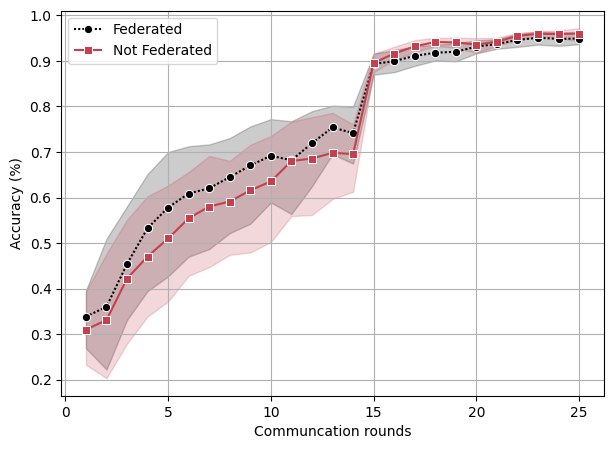

In [11]:
fig, ax = plt.subplots(figsize=(7,5))

sns.lineplot(ax=ax, data=d, x='rounds', y='g_eval_acc', dashes=[1,1], marker="o", label="Federated", color=np.array([1.4620e-03, 4.6600e-04, 1.3866e-02, 1.0000e+00]))
sns.lineplot(ax=ax, data=d, x='rounds', y='l_eval_acc', dashes=[1,0], marker="s", label="Not Federated", color=np.array([0.780517, 0.243327, 0.299523, 1.      ]))
ax.legend()
ax.grid(True)
ax.set_xlabel("Communcation rounds")
ax.set_ylabel("Accuracy (%)")
fig.savefig("acc-with-iid.eps", format='eps', dpi=200)